<a href="https://colab.research.google.com/github/nervaljunior/Saindo-/blob/main/Arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="width: 100%; overflow: hidden;">
        <h1>Time Series Analysis</h1>
        <h1>ARIMA Models</h1>
        <p>Nerval Junior e Fabricio Santos<br/>
        <a href="https://github.com/nervaljunior">github</a><br/>
        @nervalzin_d</p></div>
</div>


#### **`ARIMA`**

Método estatístico que utiliza autoregressão e médias móveis para previsão de séries temporais. Um modelo linear é construído incluindo um número especificado de termos e os dados são preparados por um nível de diferenciação afim de tornar este estacionário.

Podemos usar um valor 0 para desligar um parâmetro, dessa forma, aquela função em questão não será feita, por exemplo, se no parâmetro d definirmos 0 não será realizada uma diferenciação nos dados. Neste exemplo teríamos um modelo **ARMA**.

---

# Passos do Modelo ARIMA:

1. Tornar os dados estacionários por diferenciação. (I)
2. Ajustar um modelo AR. (AR)
3. Ajustar um modelo MA nos resíduos. (MA)
4. Obter os dados originais de volta.

---

*   **AR**: *Autoregression* : Um modelo que usa a relação dependende entre uma observação e alguns lags.

Equation for AR model : <br>
![alt text](https://i.stack.imgur.com/cj6yX.png)

A função simplesmente multiplica os coeficientes $\theta$ com os valores em execução das variáveis estocásticas $\epsilon$. Geramos alguns exemplos de processos MA.

*   **I**: *Integrated*  : Uso de diferenciação nas observações brutas, exemplo: subtração do valor de uma observação com sua observação anterior. O objetivo é transformar a série temporal em estacionária.

*  **MA**: *Moving Average* : Um modelo que usa a dependência entre a observação e o erro residual a partir de um modelo de média móvel aplicado a lags.

          residual error = expected − predicted
    
- Isso é diferente de **Moving Average Smoothing.**
- Erros residuais contém estruturas temporais que podem ser modeladas.
- Existem sinais complexos nos erros residuais.
- Um modelo que prever o erro residual pode ser usado para ajustar os próximos erros e melhorar um modelo que aprende com o histórico.




---

O modelo arima contém alguns parâmetros


```
# ARIMA(p,d,q)
```
*   **p:** O número de lags que foram devem ser incluídos no modelo.
*   **d:** O número de vezes que as observações serão diferenciadas.
*   **q:** O tamanho de uma janela de média móvel. Também chamada de ordem de média móvel.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving wind_merged.xlsx to wind_merged.xlsx


In [155]:
import pandas as pd
df = pd.read_excel('/content/wind_merged.xlsx',header=0, index_col=0, parse_dates=True, squeeze=True)
df.head()

,Int Temp (°C),Ext Temp (°C),Pressure (hPa),Rel Humidity (%),Wiper count,Vbatt (V),40m Wind Speed (m/s),40m Wind Speed Dispersion (m/s),40m Wind Speed min (m/s),40m Wind Speed max (m/s),...,260m Wind Speed Dispersion (m/s),260m Wind Speed min (m/s),260m Wind Speed max (m/s),260m Wind Direction (°),260m Z-wind (m/s),260m Z-wind Dispersion (m/s),260m CNR (dB),260m CNR min (dB),260m Dopp Spect Broad (m/s),260m Data Availability (%)
Timestamp (end of interval),,,,,,,,,,,,,,,,,,,,,
2023-02-26 11:50:00,37.4,999,999,999,0,NaN,5.04,1.21,2.11,7.89,...,1.23,2.87,9.36,325.56,0.20,0.66,-19.48,-21.80,0.08,100.00
2023-02-26 12:00:00,37.7,999,999,999,0,NaN,5.61,1.15,2.79,9.87,...,1.26,1.86,10.72,324.24,0.36,0.81,-20.08,-22.93,0.09,98.67
2023-02-26 12:10:00,38.2,999,999,999,0,NaN,4.96,1.44,1.10,7.98,...,1.54,1.22,10.01,339.82,-0.60,1.60,-20.22,-22.87,0.16,99.33
2023-02-26 12:20:00,38.8,999,999,999,0,NaN,5.30,1.23,1.50,9.55,...,1.64,1.09,8.80,323.29,0.43,1.09,-20.14,-21.87,0.11,100.00
2023-02-26 12:30:00,39.0,999,999,999,0,NaN,3.94,1.23,0.54,7.52,...,1.18,2.20,9.21,314.48,-0.06,0.91,-20.16,-22.60,0.12,100.00


In [156]:
# elimina os warnings das bibliotecas
import warnings
warnings.filterwarnings("ignore")

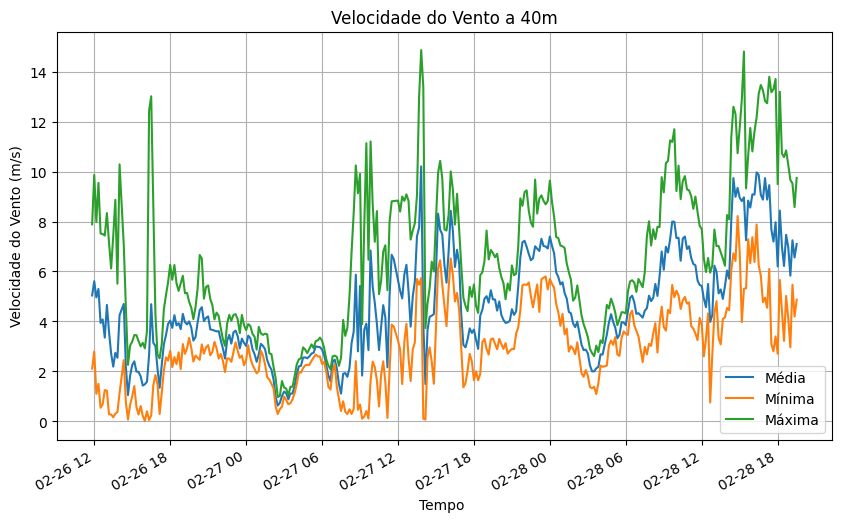

In [157]:
import matplotlib.pyplot as plt
dados_velocidade = df[['40m Wind Speed (m/s)', '40m Wind Speed min (m/s)', '40m Wind Speed max (m/s)']]

# Plotar os dados
dados_velocidade.plot(figsize=(10, 6))  # Tamanho opcional do gráfico
plt.title('Velocidade do Vento a 40m')
plt.xlabel('Tempo ')
plt.ylabel('Velocidade do Vento (m/s)')
plt.grid(True)
plt.legend(['Média', 'Mínima', 'Máxima'])
plt.show()

In [158]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 330 entries, 2023-02-26 11:50:00 to 2023-02-28 19:30:00
Columns: 245 entries, Int Temp (°C) to 260m Data Availability (%)
dtypes: float64(241), int64(4)
memory usage: 634.2 KB


(330, 245)

In [159]:
df.index.min(), df.index.max()

(Timestamp('2023-02-26 11:50:00'), Timestamp('2023-02-28 19:30:00'))

In [160]:
velocidade_media = df[['40m Wind Speed (m/s)']]
velocidade_media.head()

,40m Wind Speed (m/s)
Timestamp (end of interval),
2023-02-26 11:50:00,5.04
2023-02-26 12:00:00,5.61
2023-02-26 12:10:00,4.96
2023-02-26 12:20:00,5.30
2023-02-26 12:30:00,3.94


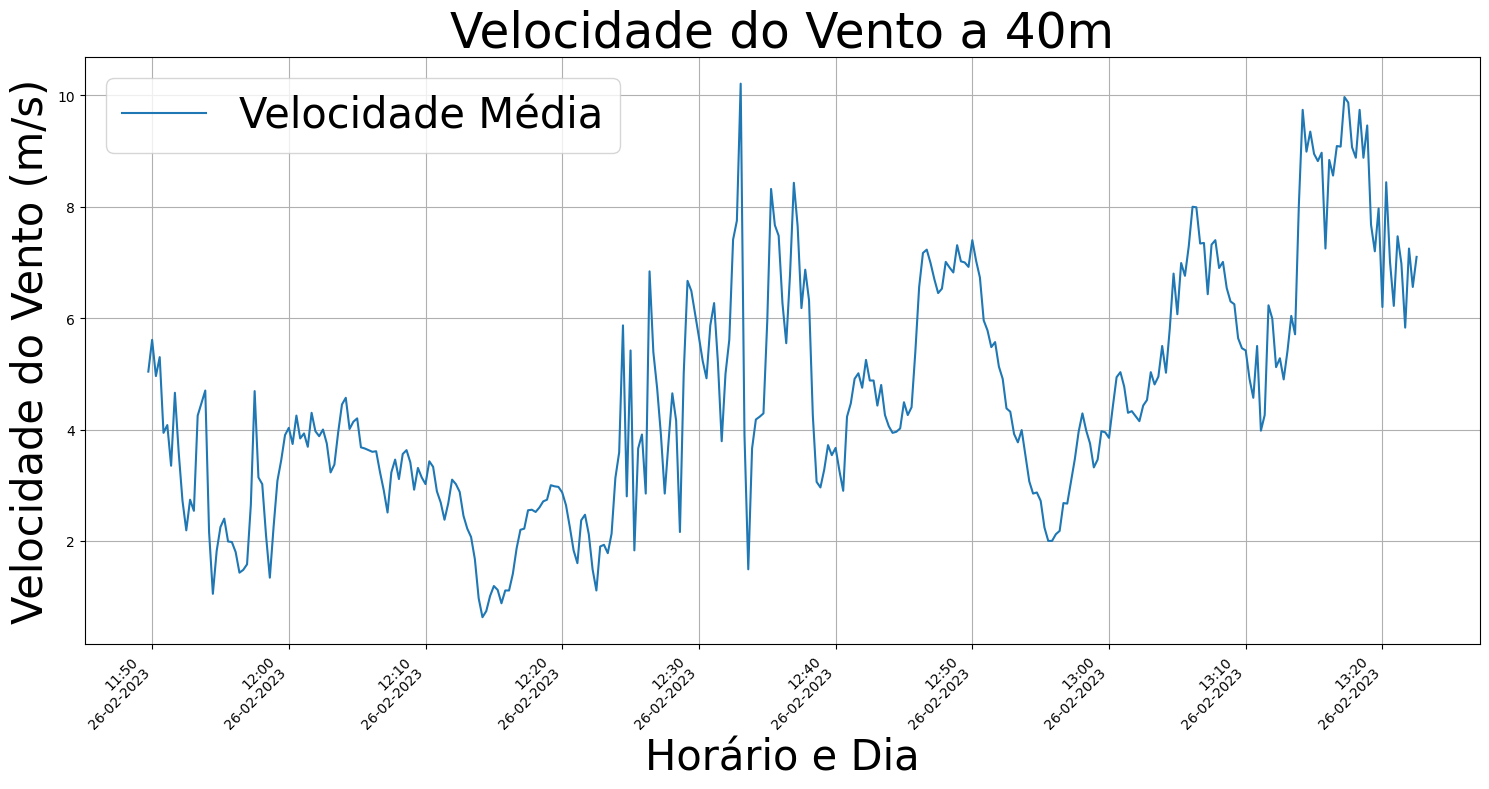

In [161]:
#velocidade_media.plot()
ax = velocidade_media.plot(figsize=(15, 8))  # Tamanho opcional do gráfico

# Ajustar formato do eixo x para mostrar apenas o horário e o dia
ax.set_xticklabels([str(item.strftime('%H:%M\n%d-%m-%Y')) for item in velocidade_media.index], rotation=45)

plt.title('Velocidade do Vento a 40m', fontsize=35)  # Aumentar o tamanho da fonte do título
plt.xlabel('Horário e Dia', fontsize=30)  # Aumentar o tamanho da fonte do rótulo do eixo x
plt.ylabel('Velocidade do Vento (m/s)', fontsize=30)  # Aumentar o tamanho da fonte do rótulo do eixo y
plt.grid(True)
plt.legend(['Velocidade Média'], loc='upper left', fontsize=30)  # Aumentar o tamanho da fonte da legenda
plt.tight_layout()  # Ajustar layout para evitar sobreposição de rótulos
plt.show()

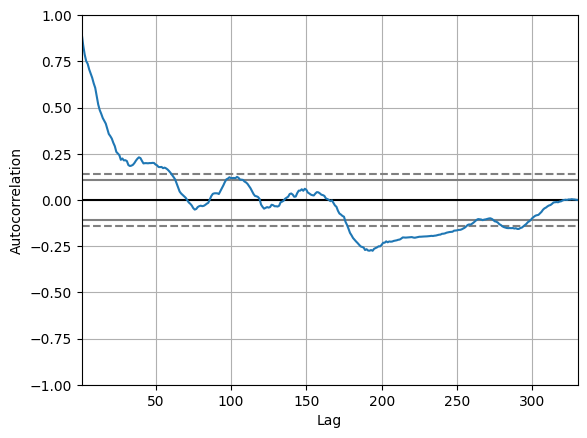

In [162]:
from pandas.plotting import autocorrelation_plot
# autocorrelation plot

autocorrelation_plot(velocidade_media)
plt.show()

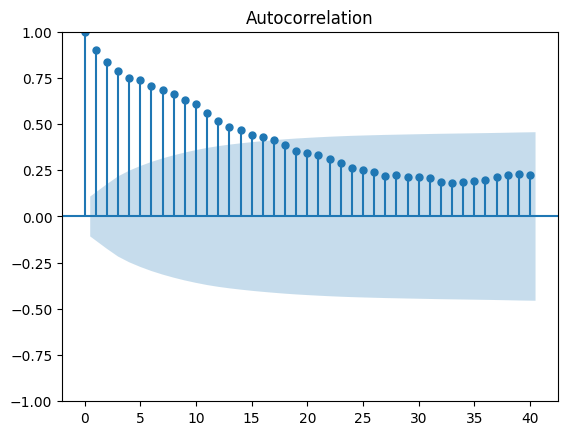

In [163]:
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(velocidade_media, lags=40)
pyplot.show()

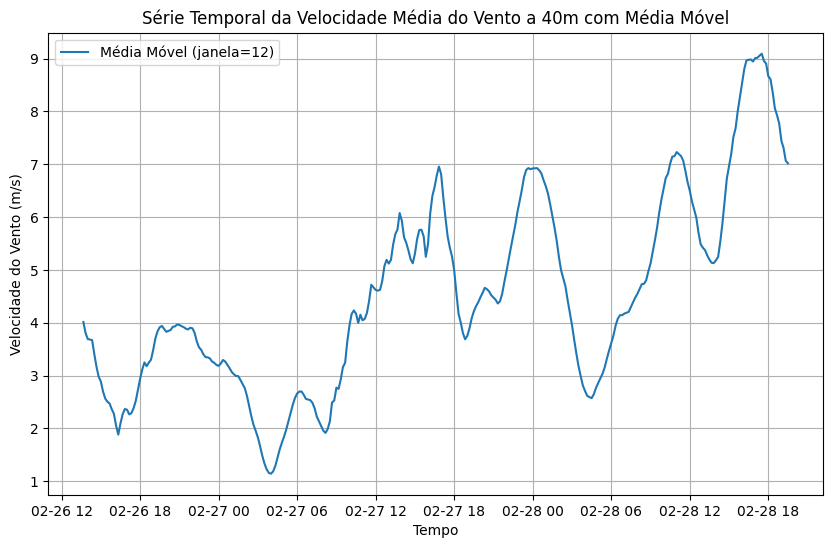

In [164]:
# Média móvel
media_movel = velocidade_media.rolling(window=12).mean()

# Crie um gráfico da série temporal da velocidade média do vento com a média móvel
#plt.plot(velocidade_media, label='Série Temporal Original')
plt.figure(figsize=(10, 6))
plt.plot(media_movel, label='Média Móvel (janela=12)')
plt.title('Série Temporal da Velocidade Média do Vento a 40m com Média Móvel')
plt.xlabel('Tempo')
plt.ylabel('Velocidade do Vento (m/s)')
plt.legend()
plt.grid(True)
plt.show()

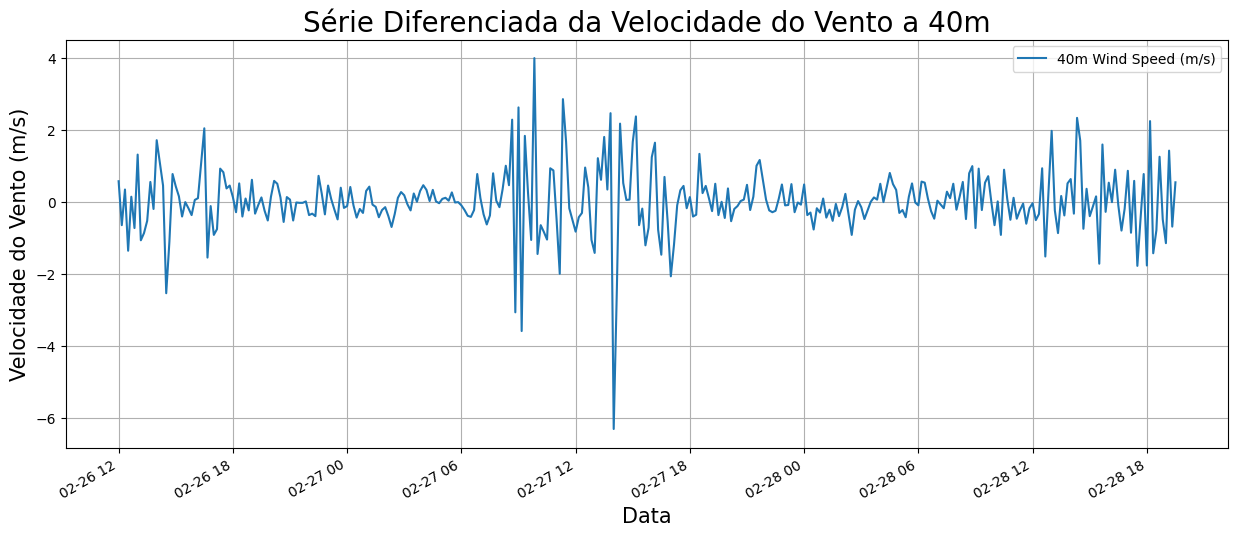

In [165]:
# Diferenciação
diff_series = velocidade_media.diff().dropna()
diff_series.plot(figsize=(15, 6))
plt.title('Série Diferenciada da Velocidade do Vento a 40m', fontsize=20)
plt.xlabel('Data', fontsize=15)
plt.ylabel('Velocidade do Vento (m/s)', fontsize=15)
plt.grid(True)
plt.show()

In [166]:
from statsmodels.tsa.stattools import adfuller
def adf_check(time_series):
    result = adfuller(time_series, autolag='AIC')
    print('Teste Aumentado de Dickey-Fuller:')
    labels = ['Estatística do Teste ADF', 'Valor-p', 'Número de Defasagens Utilizadas', 'Número de Observações Utilizadas']

    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))

    if result[1] <= 0.05:
        print("forte evidência contra a hipótese nula, rejeita-se a hipótese nula. Os dados não têm raiz unitária e são estacionários")
    else:
        print("evidência fraca contra a hipótese nula, a série temporal possui uma raiz unitária, indicando que é não estacionária \n")

# Passo 1: Tornando os dados estacionários

Diferentes técnicas podem ser usadas para tornar os dados estacionários, como o uso de logaritmo e diferenciação. A diferenciação adicional diff(12) é usada para remover a sazonalidade.

In [167]:
adf_check(diff_series)

#df_testing = pd.DataFrame(np.log(velocidade_media).diff().diff(12))
#adf_check(df_testing.dropna())

Teste Aumentado de Dickey-Fuller:
Estatística do Teste ADF : -12.394113137665443
Valor-p : 4.717158803619854e-23
Número de Defasagens Utilizadas : 3
Número de Observações Utilizadas : 325
forte evidência contra a hipótese nula, rejeita-se a hipótese nula. Os dados não têm raiz unitária e são estacionários


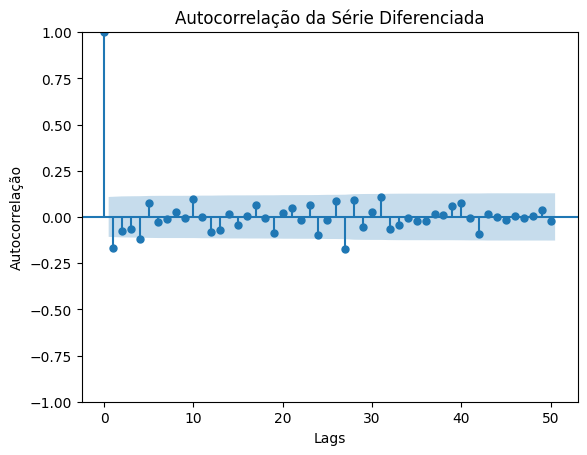

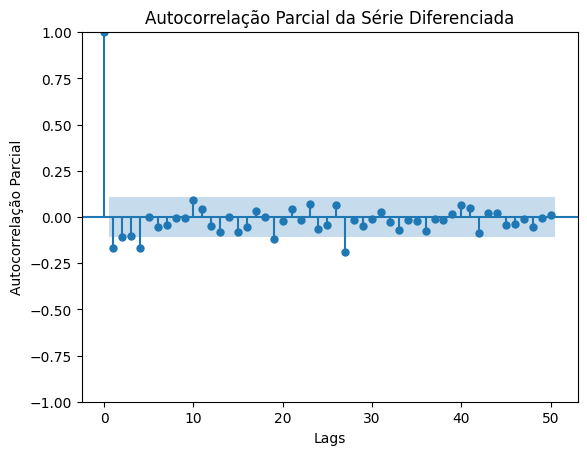

In [168]:

plot_acf(diff_series, lags=50)
plt.title('Autocorrelação da Série Diferenciada')
plt.xlabel('Lags')
plt.ylabel('Autocorrelação')
plt.show()

plot_pacf(diff_series, lags=50)
plt.title('Autocorrelação Parcial da Série Diferenciada')
plt.xlabel('Lags')
plt.ylabel('Autocorrelação Parcial')
plt.show()

In [169]:
!pip install pmdarima

In [170]:
from pmdarima import auto_arima
fit_arima = auto_arima(velocidade_media, d=1, start_p=1, start_q=1, max_p=3, max_q=3,
                    seasonal=True,
                           m=6,
                           D=1,
                           start_P=1,
                           start_Q=1,
                           max_P=2,
                           max_Q=2,
                           information_criterion='aic',
                           trace=True,
                           error_action='ignore',
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=inf, Time=1.32 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=1097.687, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=1011.745, Time=0.31 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=0.70 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=1088.091, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=964.953, Time=0.18 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=1.80 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=1.22 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=970.448, Time=0.22 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=962.824, Time=0.56 sec
 ARIMA(2,1,0)(1,1,0)[6]             : AIC=1009.054, Time=0.33 sec
 ARIMA(2,1,0)(2,1,1)[6]             : AIC=inf, Time=3.95 sec
 ARIMA(2,1,0)(1,1,1)[6]             : AIC=inf, Time=2.23 sec
 ARIMA(3,1,0)(2,1,0)[6]             : AIC=962.107, Time=0.55 sec
 ARIMA(3,1,0)(1,1,0)[6]             : AIC=1009.105, Time=0.39 sec
 

Modelo ARIMA para análise de dados

In [171]:
print(velocidade_media.index)

DatetimeIndex(['2023-02-26 11:50:00', '2023-02-26 12:00:00',
               '2023-02-26 12:10:00', '2023-02-26 12:20:00',
               '2023-02-26 12:30:00', '2023-02-26 12:40:00',
               '2023-02-26 12:50:00', '2023-02-26 13:00:00',
               '2023-02-26 13:10:00', '2023-02-26 13:20:00',
               ...
               '2023-02-28 18:00:00', '2023-02-28 18:10:00',
               '2023-02-28 18:20:00', '2023-02-28 18:30:00',
               '2023-02-28 18:40:00', '2023-02-28 18:50:00',
               '2023-02-28 19:00:00', '2023-02-28 19:10:00',
               '2023-02-28 19:20:00', '2023-02-28 19:30:00'],
              dtype='datetime64[ns]', name='Timestamp (end of interval)', length=330, freq=None)


In [172]:
from statsmodels.tsa.arima.model import ARIMA

#Best model:  ARIMA(3,1,1)(2,1,0)[6]
# Criando o modelo ARIMA
model = ARIMA(velocidade_media, order=(3,1,1))
model_fit = model.fit()
# summary
print(model_fit.summary())

                                SARIMAX Results                                 
Dep. Variable:     40m Wind Speed (m/s)   No. Observations:                  330
Model:                   ARIMA(3, 1, 1)   Log Likelihood                -427.461
Date:                  Thu, 15 Feb 2024   AIC                            864.922
Time:                          02:43:14   BIC                            883.903
Sample:                               0   HQIC                           872.494
                                  - 330                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4427      0.180      2.457      0.014       0.090       0.796
ar.L2         -0.0129      0.056     -0.230      0.818      -0.123       0.097
ar.L3         -0.0618      0.064    

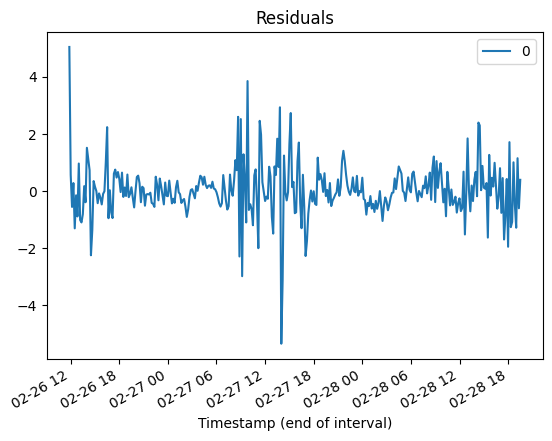

In [173]:
# plot residuais
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)

residuals.plot(title="Residuals")
plt.show()

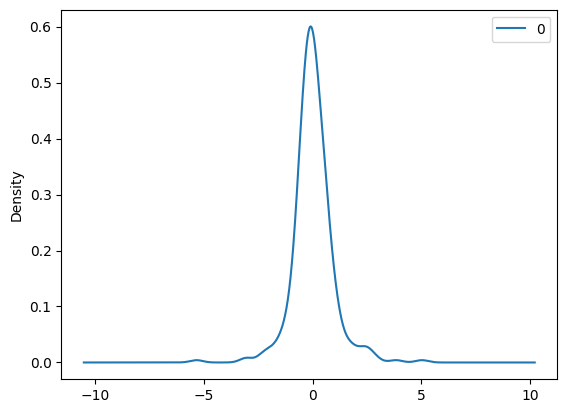

In [174]:
# gráficos de densidade dos residuais
residuals.plot(kind='kde')
pyplot.show()

In [175]:
# estatística descritiva dos residuos
print(residuals.describe())

                0
count  330.000000
mean     0.026046
std      0.929233
min     -5.336795
25%     -0.413929
50%     -0.030974
75%      0.441742
max      5.040000


**Prevendo dados com ARIMA utilizando Walk Forward**

Separando os dados de treino e teste

In [176]:
# a variável X recebe os dados da série
X = velocidade_media.values
X = X.astype('float32')

In [177]:
# Separa os dados com 50% dos dados para treino e 50% dos dados para teste
size = int(len(X) * 0.50)

In [178]:
# Separa dados de treino e teste
train = X[0:size]
test =  X[size:]

In [179]:
# cria a variável history
history = [x for x in train]

In [180]:
# cria lista de previsões
predictions = list()

In [181]:
# Cria a função que faz a diferenciação
def difference(dataset, interval=1):
  diff = list()
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
  return diff

# cria função que reverte o valor diferenciado para o original
def inverse_difference(history, previsao, interval=1):
  return previsao + history[-interval]

In [182]:
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

# inicia Walk-Forward
for t in range(len(test)):
    # difference data
    meses_no_ano = 12
    diff = difference(history, meses_no_ano)

    # cria um modelo ARIMA com os dados de history
    model = ARIMA(diff, order=(0,0,1))

    # treina o modelo ARIMA
    model_fit = model.fit()

    # a variável valor_predito recebe o valor previsto pelo modelo
    valor_predito = model_fit.forecast()[0]

    # valor_predito recebe o valor revertido (escala original)
    valor_predito = inverse_difference(history, valor_predito, meses_no_ano)

    # adiciona o valor predito na lista de predicões
    predictions.append(valor_predito)

    # a variável valor_real recebe o valor real do teste
    valor_real = test[t]

    # adiciona o valor real a variável history
    history.append(valor_real)

    # imprime valor predito e valor real
    print('Valor predito=%.3f, Valor esperado=%3.f' % (valor_predito, valor_real))


Valor predito=7.602, Valor esperado=  6
Valor predito=9.617, Valor esperado=  6
Valor predito=1.783, Valor esperado=  7
Valor predito=4.087, Valor esperado=  8
Valor predito=6.049, Valor esperado=  8
Valor predito=5.255, Valor esperado=  6
Valor predito=4.937, Valor esperado=  7
Valor predito=5.583, Valor esperado=  6
Valor predito=6.579, Valor esperado=  4
Valor predito=7.201, Valor esperado=  3
Valor predito=5.451, Valor esperado=  3
Valor predito=6.166, Valor esperado=  3
Valor predito=4.672, Valor esperado=  4
Valor predito=5.083, Valor esperado=  4
Valor predito=5.956, Valor esperado=  4
Valor predito=7.128, Valor esperado=  3
Valor predito=5.344, Valor esperado=  3
Valor predito=4.701, Valor esperado=  4
Valor predito=6.575, Valor esperado=  4
Valor predito=5.004, Valor esperado=  5
Valor predito=4.165, Valor esperado=  5
Valor predito=3.558, Valor esperado=  5
Valor predito=3.683, Valor esperado=  5
Valor predito=4.250, Valor esperado=  5
Valor predito=4.120, Valor esperado=  5


In [183]:
# Avaliando os resultados
from numpy import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.623


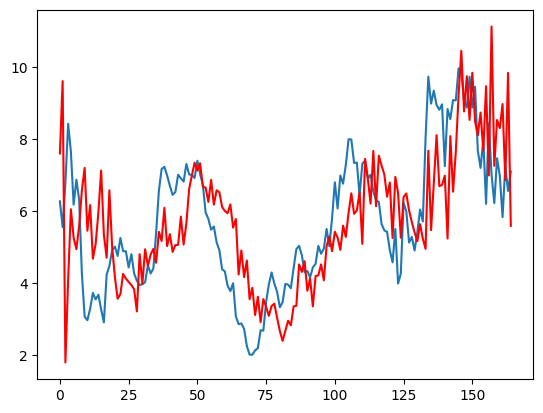

In [184]:
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

#### `Analisando Resíduos`

      Erro Residual = Valor esperado − Valor Predito

- Erros residuais são erros em previsões de séries temporais.
- Uma análise dos erros pode sugerir melhoras no modelo.
  - Tendências.
  - Sazonalidades.

In [185]:
# erros residuais
residuals = [test[i] - predictions[i] for i in range(len(test))]

In [186]:
# converte a lista em um dataframe
residuals = pd.DataFrame(residuals)

In [187]:
# imprime as 5 primeiras linhas
residuals.head()

,0
0,-1.332087
1,-4.066871
2,5.006756
3,4.343496
4,1.601116


In [188]:
# estatística descritiva
residuals.describe()

,0
count,165.000000
mean,0.010638
std,1.628281
min,-4.140969
25%,-1.038376
50%,0.266474
75%,1.066232
max,5.006756


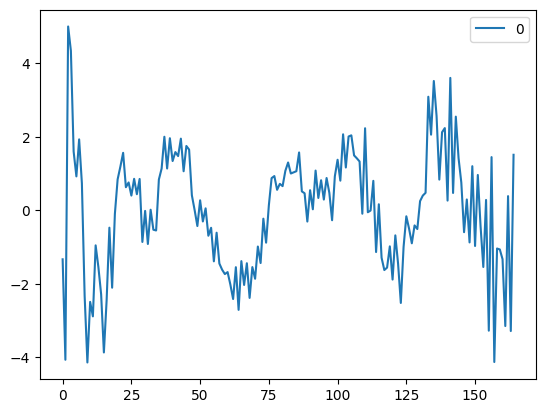

In [189]:
# plot residuals
residuals.plot()
pyplot.show()

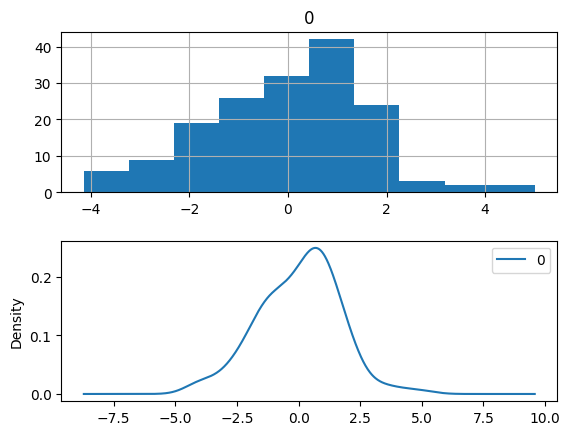

In [190]:
# plots histograma
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())

pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

In [191]:
# importa os pacotes de autocorrelação
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

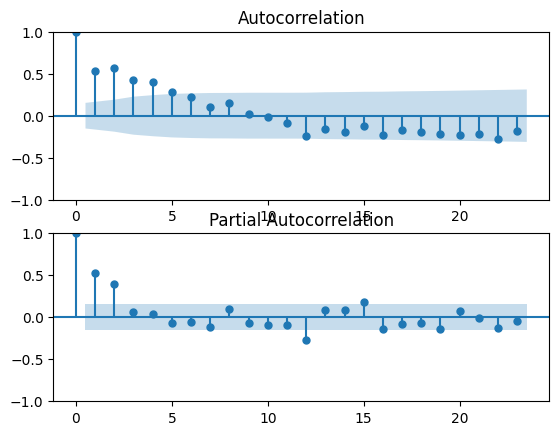

In [192]:
# plots de autocorrelação
pyplot.figure()
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, ax=pyplot.gca())
pyplot.show()

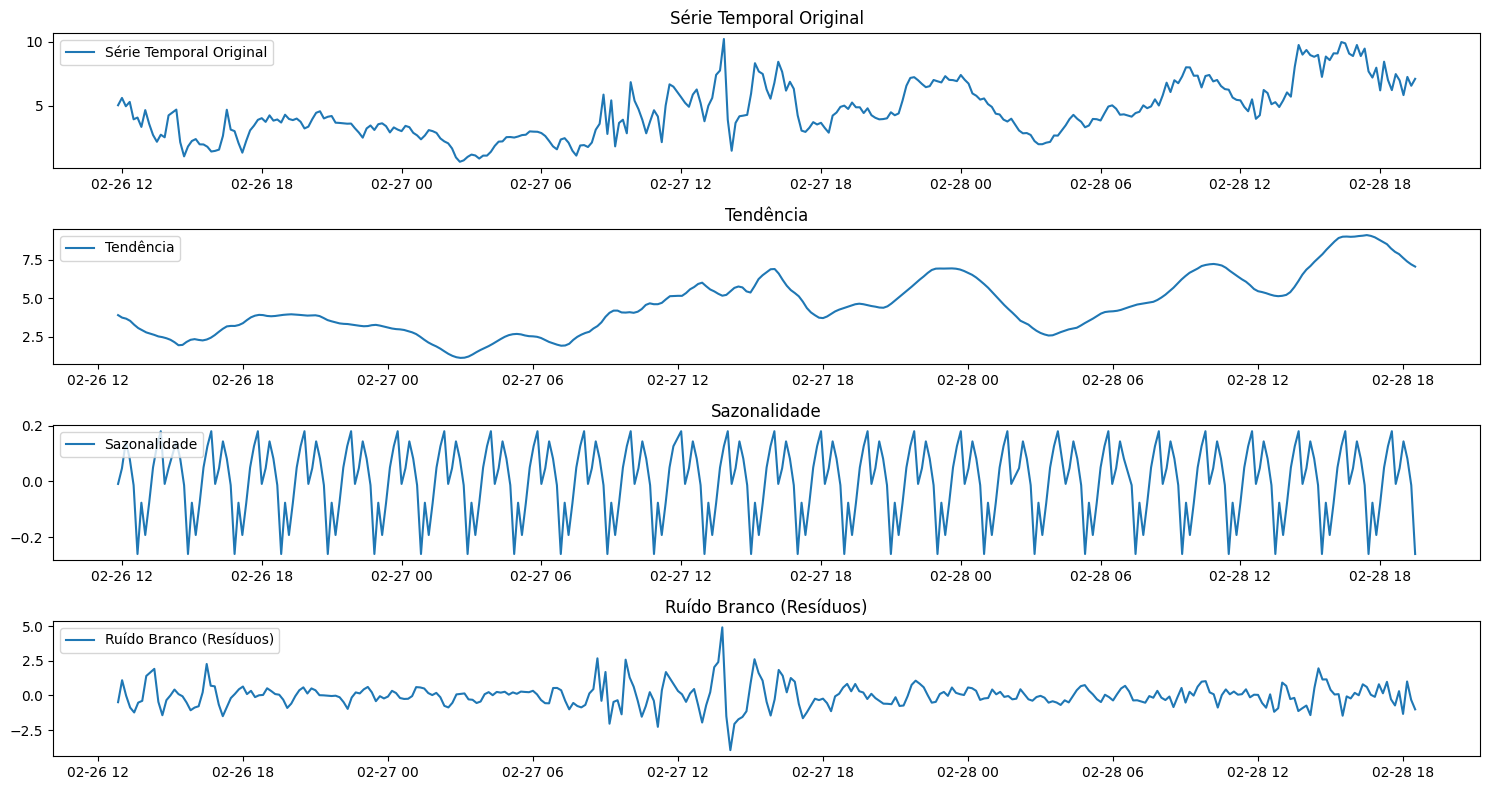

In [193]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposição da série temporal
decomposition = seasonal_decompose(velocidade_media, period=12,model='additive')  # Ajuste o período sazonal conforme necessário
#decomposition = seasonal_decompose(velocidade_media, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Visualização dos componentes
plt.figure(figsize=(15, 8))
plt.subplot(4, 1, 1)
plt.plot(velocidade_media, label='Série Temporal Original')
plt.legend(loc='upper left')
plt.title('Série Temporal Original')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Tendência')
plt.legend(loc='upper left')
plt.title('Tendência')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Sazonalidade')
plt.legend(loc='upper left')
plt.title('Sazonalidade')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Ruído Branco (Resíduos)')
plt.legend(loc='upper left')
plt.title('Ruído Branco (Resíduos)')

plt.tight_layout()
plt.show()

                                SARIMAX Results                                 
Dep. Variable:     40m Wind Speed (m/s)   No. Observations:                  330
Model:                   ARIMA(1, 1, 2)   Log Likelihood                -427.791
Date:                  Thu, 15 Feb 2024   AIC                            863.583
Time:                          02:44:11   BIC                            878.767
Sample:                               0   HQIC                           869.640
                                  - 330                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5505      0.198      2.780      0.005       0.162       0.939
ma.L1         -0.7722      0.199     -3.874      0.000      -1.163      -0.382
ma.L2         -0.0046      0.074    

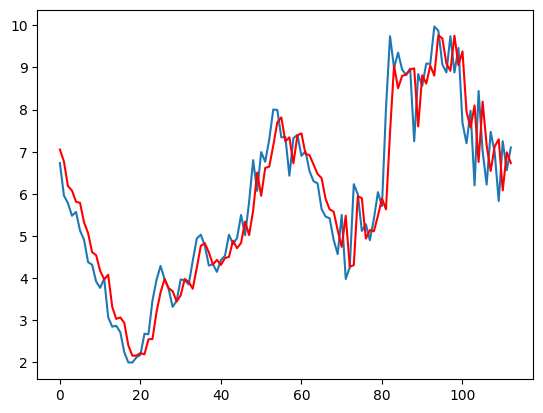

In [194]:
# Modelo ARIMA
modelo_arima = ARIMA(velocidade_media, order=(1, 1, 2))  # AR=1, I=1, MA=1
resultado_arima = modelo_arima.fit()
print(resultado_arima.summary())

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
velocidade_media.index = velocidade_media.index.to_period('M')
# split into train and test sets
X = velocidade_media.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

nesse algoritmo Integrar algoritmos genéticos com modelos ARMA (AutoRegressive Moving Average) ou ARIMA (AutoRegressive Integrated Moving Average)  para otimizar os parâmetros do modelo e melhorar a precisão das previsões dessa maneira:

- Defina a Função de Aptidão (Fitness Function): A função de aptidão avalia a qualidade de um conjunto específico de parâmetros do modelo ARMA ou ARIMA. Isso pode ser baseado em medidas de erro, como MSE (Mean Squared Error) ou MAE (Mean Absolute Error), calculadas usando validação cruzada ou outro método de validação.

- Parâmetros do Modelo: Represente os parâmetros do modelo ARMA ou ARIMA como cromossomos em uma população. Cada cromossomo representa uma possível combinação de parâmetros.

- Inicialize a População: Gere uma população inicial de cromossomos com parâmetros aleatórios ou usando algum conhecimento prévio sobre os parâmetros.

- Avalie a Aptidão (Fitness) da População: Para cada conjunto de parâmetros na população, aplique o modelo ARMA ou ARIMA aos dados de treinamento e calcule a função de aptidão.

- Selecione os Pais: Selecione os cromossomos com as melhores funções de aptidão para serem os pais da próxima geração. Isso pode ser feito usando métodos de seleção como a roleta ou o torneio.

- Reprodução e Crossover: Use operadores de crossover para combinar os genes dos pais e criar novos cromossomos. Isso pode envolver a troca de partes dos cromossomos entre os pais.

- Mutação: Introduza aleatoriedade na população alterando alguns dos genes (parâmetros) dos cromossomos de forma aleatória.

- Avalie a Nova População: Aplique novamente o modelo ARMA ou ARIMA com os parâmetros atualizados aos dados de treinamento e calcule a função de aptidão para a nova população.

- Critério de Parada: Repita os passos 5 a 8 por um número fixo de gerações ou até que a convergência seja alcançada com base em algum critério de parada, como estagnação da melhoria da função de aptidão.

- Retorne o Melhor Modelo: Após as iterações, retorne o conjunto de parâmetros do modelo que produziu a melhor função de aptidão como a solução otimizada.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from deap import creator, base, tools, algorithms

# Importar os dados
df = pd.read_excel('/content/wind_merged.xlsx', header=0, index_col=0, parse_dates=True, squeeze=True)
velocidade_media = df['40m Wind Speed (m/s)']

# Definir a função de fitness
def evaluate(individual, y_train):
    p, d, q = map(int, individual)
    model = ARIMA(y_train, order=(p, max(0, d), q))
    fit_model = model.fit()
    y_pred = fit_model.predict()
    return mean_squared_error(y_train, y_pred),

# Configuração do algoritmo genético
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()
toolbox.register("attr_int", np.random.randint, 0, 5)  # Valores de p, d, q
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, n=3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxBlend, alpha=0.5)  # Crossover
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)  # Mutação
toolbox.register("select", tools.selTournament, tournsize=3)  # Seleção
toolbox.register("evaluate", evaluate, y_train=velocidade_media)  # Função de fitness

# Parâmetros do algoritmo genético
pop_size = 50
n_gen = 10
cxpb = 0.5
mutpb = 0.2

# Geração da população inicial
population = toolbox.population(n=pop_size)

# Execução do algoritmo genético
algorithms.eaSimple(population, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=n_gen, verbose=True)

# Melhor indivíduo
best_individual = tools.selBest(population, k=1)[0]
print("Melhor conjunto de parâmetros:", best_individual)

# Treinamento do modelo ARIMA com os melhores parâmetros encontrados
p, d, q = map(int, best_individual)
model = ARIMA(velocidade_media, order=(p, max(0, d), q))
fit_model = model.fit()

# Previsões
y_pred = fit_model.predict(start=len(velocidade_media), end=len(velocidade_media) + len(velocidade_media) - 1)

# Plotar resultados
plt.figure(figsize=(10, 6))
plt.plot(velocidade_media, label='Série Temporal Original')
plt.plot(np.arange(len(velocidade_media), len(velocidade_media) + len(velocidade_media)), y_pred, label='Previsão')
plt.legend()
plt.title('Série Temporal e Previsão')
plt.xlabel('Índice do Dado')
plt.ylabel('Velocidade do Vento (m/s)')
plt.grid(True)
plt.show()

